In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
water = pd.read_csv("water_potability.csv")
water.shape

(3276, 10)

In [3]:
water.head(7)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0


In [4]:
water.describe(include= "all")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
mean = water.ph.mean()
count = 0
a =[]
for index,col in water.iterrows():
    if col[0] == mean :
        count +=1
        a.append(index)
        print(f"count : {count} \n index are{a} ")
    

In [6]:
print(water.isna().sum())
water.isnull().any()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [7]:
imputer = SimpleImputer()
new_water = pd.DataFrame(imputer.fit_transform(water))
new_water.columns = water.columns
print(new_water.shape)
new_water.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [8]:
new_water.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

<AxesSubplot:xlabel='ph', ylabel='Count'>

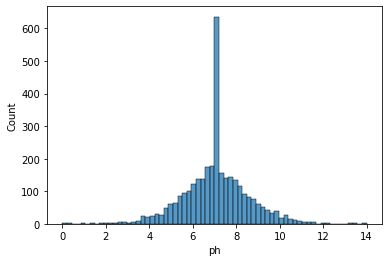

In [9]:
sns.histplot(x="ph", data=new_water)

In [10]:
potable_count =0
non_potable_count = 0
for i in new_water.Potability:
    if i == 0:
        non_potable_count +=1
    else:
        potable_count +=1
print(potable_count, non_potable_count, new_water.shape[0])
print(f"potable water % :{(potable_count/new_water.shape[0])*100}, non potable water % {(non_potable_count/new_water.shape[0])*100}")

1278 1998 3276
potable water % :39.010989010989015, non potable water % 60.98901098901099


In [11]:
new_water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

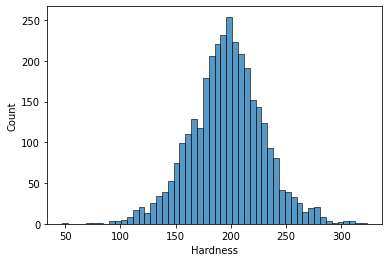

In [12]:
sns.histplot(x="Hardness", data=new_water)

<function matplotlib.pyplot.show(close=None, block=None)>

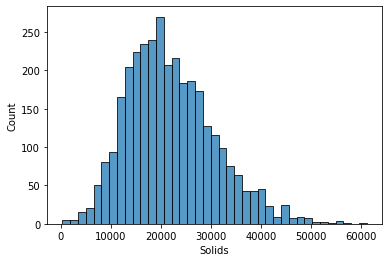

In [13]:
sns.histplot(x="Solids", data=new_water)
plt.show


<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

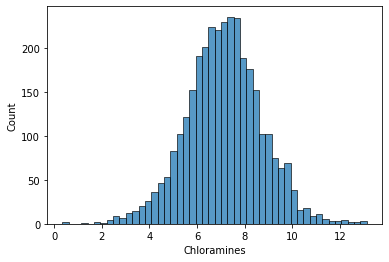

In [14]:
sns.histplot(x="Chloramines", data=new_water)

/home/vishwa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

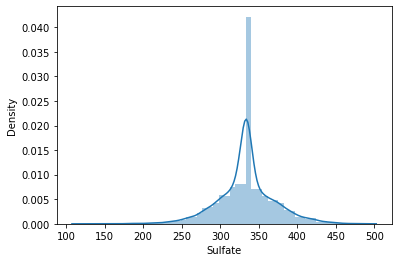

In [15]:
sns.distplot(new_water["Sulfate"])


<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

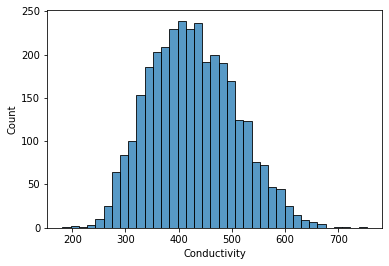

In [16]:
sns.histplot(x="Conductivity", data=new_water)

<AxesSubplot:xlabel='Organic_carbon', ylabel='Count'>

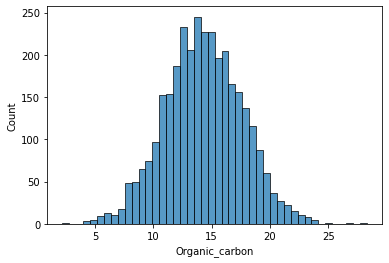

In [17]:
sns.histplot(x="Organic_carbon", data=new_water)

<AxesSubplot:xlabel='Organic_carbon', ylabel='Count'>

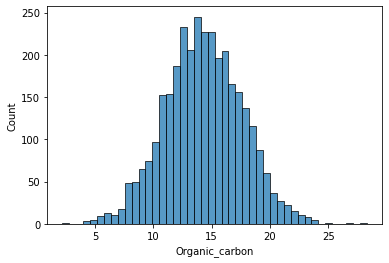

In [18]:
sns.histplot(x="Organic_carbon", data=new_water)

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

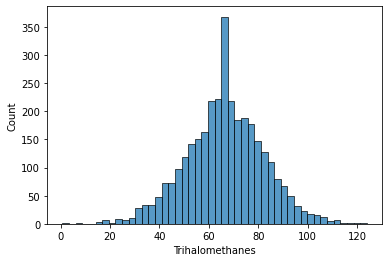

In [19]:
sns.histplot(x="Trihalomethanes", data=new_water)

/home/vishwa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Turbidity', ylabel='Density'>

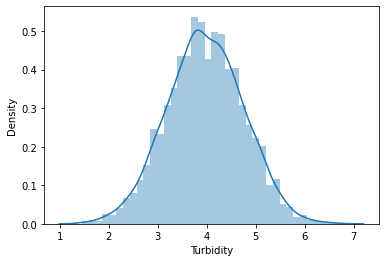

In [20]:

sns.distplot(new_water["Turbidity"])


<AxesSubplot:>

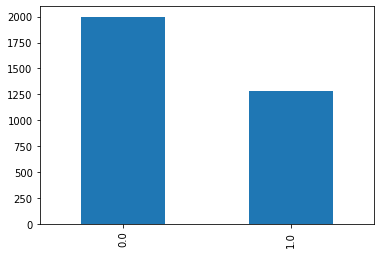

In [21]:
new_water["Potability"].value_counts().plot.bar()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


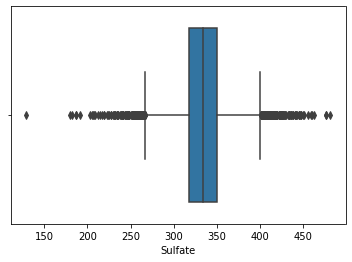

In [22]:
sns.boxplot(x="Sulfate", data=new_water)
new_water.head()

In [23]:
new_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [24]:
y = new_water[["Potability"]]
new_water.drop("Potability", inplace=True, axis=1)
x = new_water
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)


In [26]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)



DecisionTreeClassifier()

In [27]:
y_pred = clf.predict(x_test)
a = accuracy_score(y_test, y_pred)
print(f"accuracy is {a*100}")

accuracy is 56.25


In [28]:
score_list = []
for k in range(25,40):
    if k%2 ==0:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred1 = knn.predict(x_test)
        score_list.append(accuracy_score(y_test, y_pred1))

/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Text(0, 0.5, 'accuracy score')

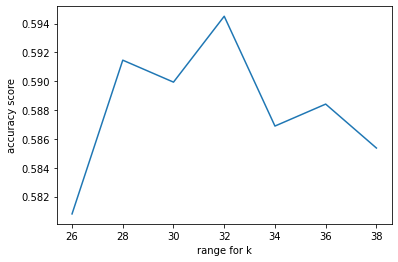

In [29]:
k = [i for i in range(25,40) if i%2==0]
plt.plot( k, score_list)
plt.xlabel("range for k")
plt.ylabel("accuracy score")

In [30]:
knn1 = KNeighborsClassifier(n_neighbors=28)

knn1.fit(x_train, y_train)


/home/vishwa/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=28)

In [31]:
y_pred2 = knn1.predict(x_test)
b= accuracy_score(y_test,y_pred2)
print(f"accuracy is {b*100}")

accuracy is 59.14634146341463


In [32]:
iter = [10,50,100,1000,1500]
score_lg = []
for k in iter:
    lg = LogisticRegression(max_iter=k)
    lg.fit(x_train,y_train)
    y_pred3 = lg.predict(x_test)
    score_lg.append(accuracy_score(y_test, y_pred3))

/home/vishwa/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vishwa/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Text(0, 0.5, 'accuracy score')

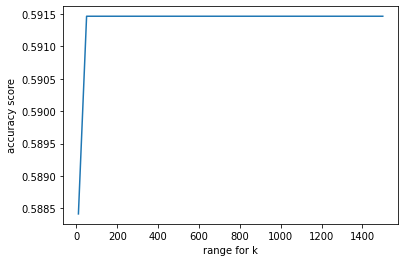

In [33]:
plt.plot( iter, score_lg)
plt.xlabel("range for k")
plt.ylabel("accuracy score")

In [34]:
new_water.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [35]:
new_water_drops = new_water.drop(["ph", "Sulfate"], axis=1, inplace=False)
new_water_drops.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(new_water_drops, y, test_size=0.2)



In [37]:
clf.fit(X_train, Y_train)


DecisionTreeClassifier()

In [38]:
new_pred = clf.predict(X_test)
print(accuracy_score(Y_test,new_pred)*100)

52.4390243902439


In [39]:
# drop data making the model to worse


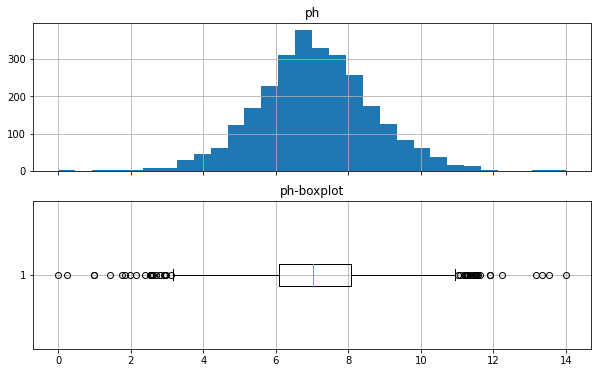

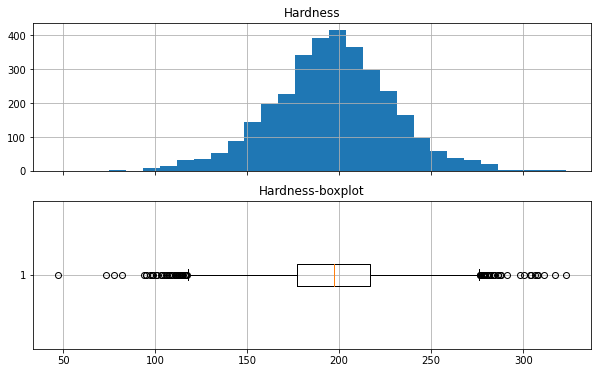

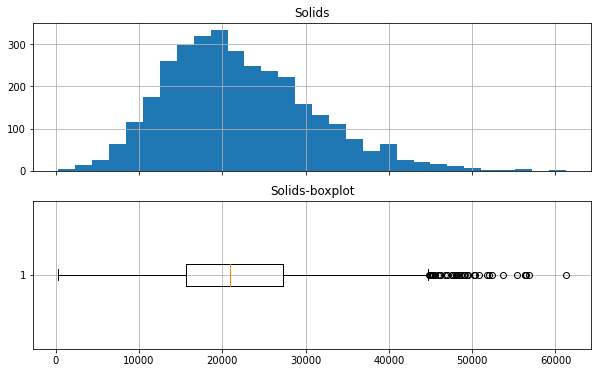

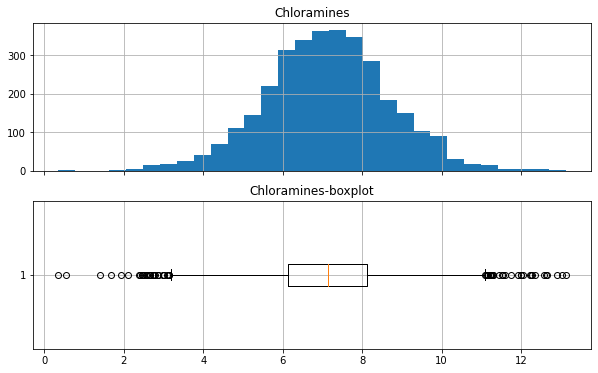

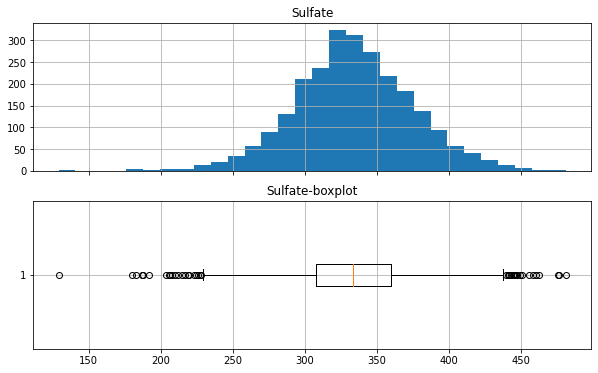

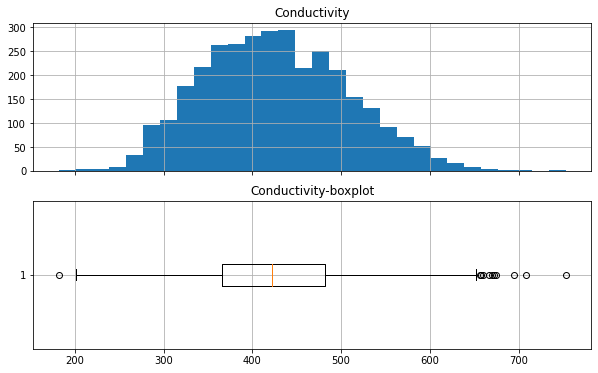

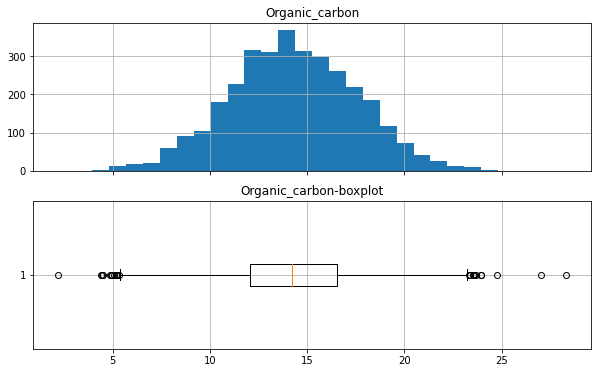

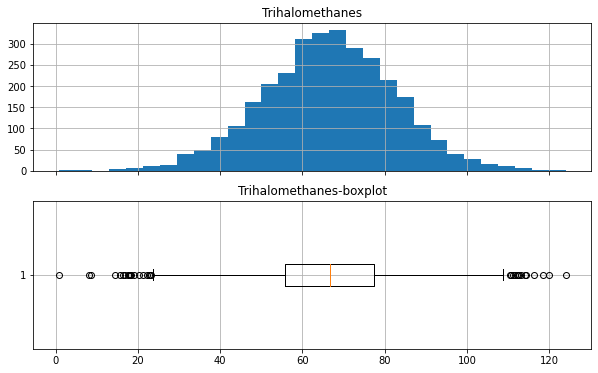

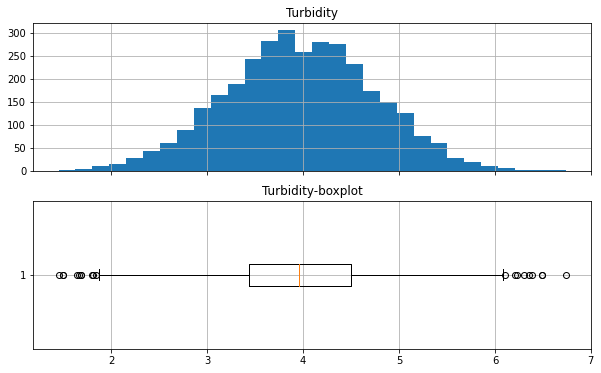

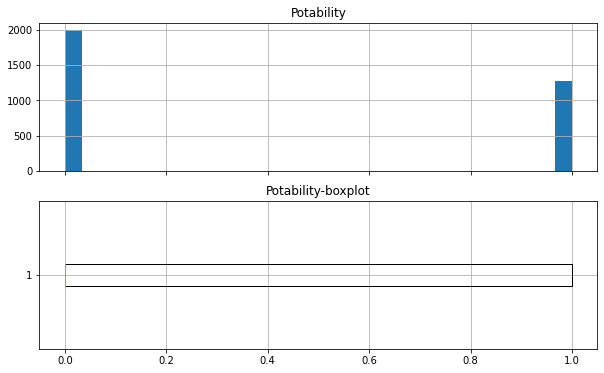

In [44]:
for i in water.columns:
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6), sharex=True)

    ax1.hist(water[i], bins=30)
    ax1.grid()
    ax1.set_title(i)

    features_wo_nan = water[~np.isnan(water[i])][i]
    ax2.boxplot(features_wo_nan, vert=False)
    ax2.grid()
    ax2.set_title(i+"-boxplot")
    plt.show()

In [47]:
features_wo_nan = water[~np.isnan(water["ph"])]["ph"]
features_wo_nan

1       3.716080
2       8.099124
3       8.316766
4       9.092223
5       5.584087
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 2785, dtype: float64

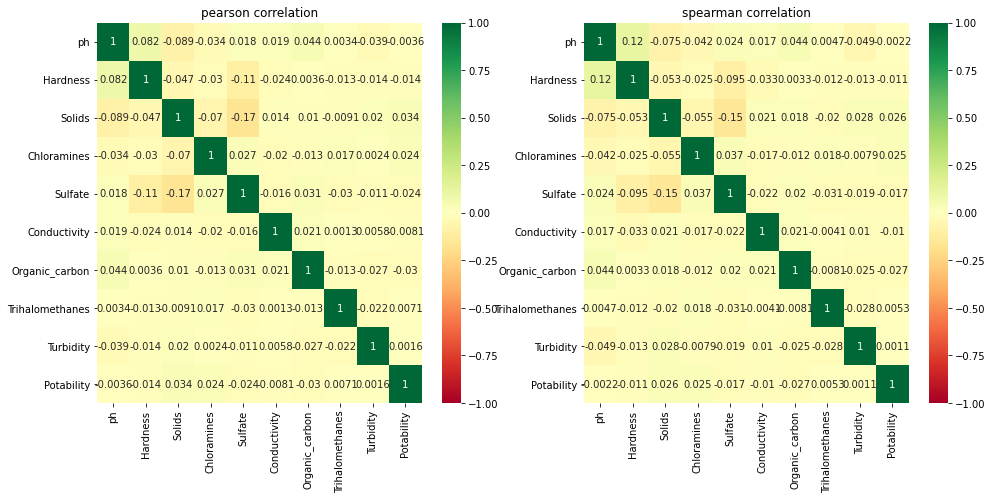

In [51]:
corr_pearson = water[water.columns].corr(method="pearson")
corr_spearman = water[water.columns].corr(method="spearman")

plt.figure(figsize=(16,7))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title("pearson correlation")

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title("spearman correlation")
plt.show()